# Radar Chart Attempt


In [1]:
import pandas as pd
from math import pi
import matplotlib.pyplot as plt
from mplsoccer import Radar, FontManager

In [ ]:
Messi = {'Pace':89,'Shooting':90,'Passing':86,'Dribbling':95,'Defending':26,'Physical':61}
Ronaldo = {'Pace':90,'Shooting':93,'Passing':82,'Dribbling':90,'Defending':33,'Physical':80}

data = pd.DataFrame([Messi,Ronaldo], index = ["Messi","Ronaldo"])

In [ ]:
data.head()

In [7]:
sancho = pd.read_csv('/Users/weiyiwang/code/TheWangAndOnly/Football/Data/Players/Sancho20-21.csv')

In [ ]:
sancho = sancho.dropna()

In [ ]:
sancho = sancho[['Statistic','Percentile']]

In [ ]:
sancho

In [ ]:
sancho = sancho.set_index('Statistic',inplace=True)
sancho = sancho.transpose()

In [ ]:
sancho = sancho.T

In [ ]:
i = sancho.iloc[0].tolist()
i += i[:]

In [ ]:
i += i[:]

In [ ]:
AttNo = len(list(sancho))
angles = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles += angles [:]
angles = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles += angles [:]
plt.xticks(angles,list(sancho))

In [ ]:
def radar_chart(data):
    
    Attributes = list(data)
    AttNo= len(Attributes)
    values = data.iloc[0].tolist()
    values += values [:]
    angles = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
    angles += angles [:]
    angles = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
    angles += angles [:]
    ax = plt.subplot(111, polar=True)

    #Add the attribute labels to our axes
    plt.xticks(angles,Attributes)

    #Plot the line around the outside of the filled area, using the angles and values calculated before
    ax.plot(angles,values)

    #Fill in the area plotted in the last line
    ax.fill(angles, values, 'teal', alpha=0.1)

    #Give the plot a title and show it
    ax.set_title("Ronaldo")
    
    return plt.show()

# Radar Chart Using MPLSoccer

## Blueprint

In [2]:
# parameter names of the statistics we want to show
params = ["npxG", "Non-Penalty Goals", "xA", "Key Passes", "Through Balls",
          "Progressive Passes", "Shot-Creating Actions", "Goal-Creating Actions",
          "Dribbles Completed", "Pressure Regains", "Touches In Box"]

# The lower and upper boundaries for the statistics
low =  [0.08, 0.0, 0.1, 1, 0.6,  4, 3, 0.3, 0.3, 2.0, 2]
high = [0.37, 0.6, 0.6, 4, 1.2, 10, 8, 1.3, 1.5, 5.5, 5]

In [3]:
radar = Radar(params, low, high,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*11,
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

In [4]:
URL1 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-Regular.ttf?raw=true')
serif_regular = FontManager(URL1)
URL2 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-ExtraLight.ttf?raw=true')
serif_extra_light = FontManager(URL2)
URL3 = ('https://github.com/google/fonts/blob/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf?raw=true')
rubik_regular = FontManager(URL3)
URL4 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Thin.ttf?raw=true'
robotto_thin = FontManager(URL4)
URL5 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Regular.ttf?raw=true'
robotto_regular = FontManager(URL5)
URL6 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Bold.ttf?raw=true'
robotto_bold = FontManager(URL6)

In [5]:
bruno_values =  [0.25, 0.42, 0.42, 3.47, 1.04, 8.06, 5.62, 0.97, 0.56, 5.14, 3.54]
bruyne_values = [0.32, 0.00, 0.43, 3.50, 0.98, 7.72, 6.18, 0.98, 1.71, 4.88, 4.96]

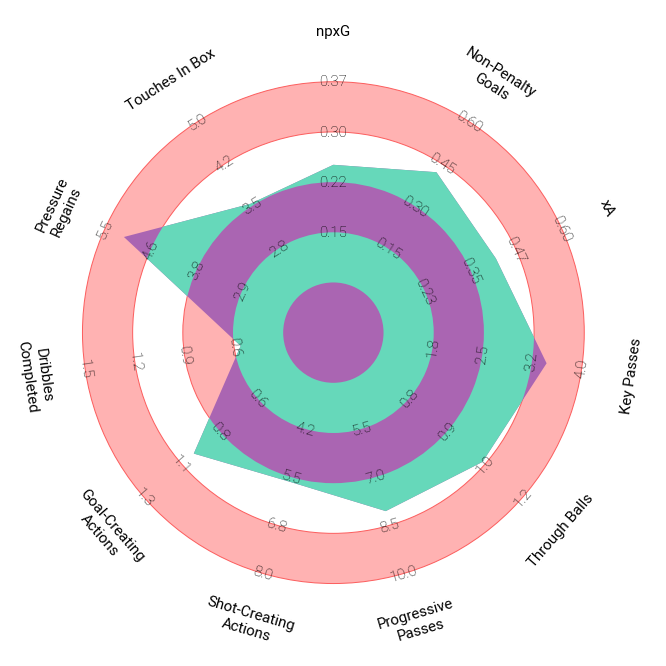

In [6]:
fig, ax = radar.setup_axis()  # format axis as a radar
rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')  # draw circles
radar_output = radar.draw_radar(bruno_values, ax=ax,
                                kwargs_radar={'facecolor': '#aa65b2'},
                                kwargs_rings={'facecolor': '#66d8ba'})  # draw the radar
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_thin.prop)  # draw the range labels
param_labels = radar.draw_param_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_regular.prop)  # draw the param labels

## Sancho

In [8]:
sancho.to_dict()

{'Statistic': {0: 'Non-Penalty Goals',
  1: 'npxG',
  2: 'Shots Total',
  3: 'Assists',
  4: 'xA',
  5: 'npxG+xA',
  6: 'Shot-Creating Actions',
  7: nan,
  8: 'Passes Attempted',
  9: 'Pass Completion %',
  10: 'Progressive Passes',
  11: 'Progressive Carries',
  12: 'Dribbles Completed',
  13: 'Touches (Att Pen)',
  14: 'Progressive Passes Rec',
  15: nan,
  16: 'Pressures',
  17: 'Tackles',
  18: 'Interceptions',
  19: 'Blocks',
  20: 'Clearances',
  21: 'Aerials won'},
 'Per 90': {0: '0.29',
  1: '0.26',
  2: '2.13',
  3: '0.51',
  4: '0.3',
  5: '0.56',
  6: '5.33',
  7: nan,
  8: '64.28',
  9: '79.60%',
  10: '6.54',
  11: '10.62',
  12: '3.86',
  13: '5.62',
  14: '9.37',
  15: nan,
  16: '10.58',
  17: '0.66',
  18: '0.62',
  19: '1.51',
  20: '0.33',
  21: '0.18'},
 'Percentile': {0: 73.0,
  1: 72.0,
  2: 56.0,
  3: 99.0,
  4: 92.0,
  5: 86.0,
  6: 96.0,
  7: nan,
  8: 99.0,
  9: 76.0,
  10: 97.0,
  11: 97.0,
  12: 96.0,
  13: 82.0,
  14: 93.0,
  15: nan,
  16: 7.0,
  17: 5.0,

In [ ]:
sancho_ = sancho.iloc[:,0]

In [ ]:
sancho_

In [ ]:
print(len(list(sancho)))

In [ ]:
sancho.head()

In [ ]:
len(sancho['Percentile'])

In [ ]:
params = sancho_
low =  [0.08, 0.0, 0.1, 1, 0.6,  4, 3, 0.3, 0.3, 2.0, 2, 3, 4, 5 ,5 ,5, 4,4,4,4,3,2]
high = [0.37, 0.6, 0.6, 4, 1.2, 10, 8, 1.3, 1.5, 5.5, 5,3,3,3,3,3,3,3,3,3,3,2]


In [ ]:
len(low)

In [ ]:
radar = Radar(params, low, high,
              # whether to round any of the labels to integers instead of decimal places
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

In [ ]:
fig, ax = radar.setup_axis()  # format axis as a radar
rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')  # draw circles
radar_output = radar.draw_radar(sancho.iloc[2,:], ax=ax,
                                kwargs_radar={'facecolor': '#aa65b2'},
                                kwargs_rings={'facecolor': '#66d8ba'})  # draw the radar
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_thin.prop)  # draw the range labels
param_labels = radar.draw_param_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_regular.prop)  # draw the param labels